In [231]:
import glob
import numpy as np
from numpy import linalg as LA
import pandas as pd 


from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import normalize
from scipy.ndimage import gaussian_filter as g
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor  


import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

np.random.seed(0)

np.printoptions(precision=3, suppress=True)




In [230]:



#%% import data
X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

feature_names = ["_".join(item.split()) for item in Data.feature_names] + ['diagnosis']
_dp = np.concatenate([Data.data, np.expand_dims(Y, 1)], axis=1)

dp = pd.DataFrame(_dp, columns=feature_names)

#%% Test for data property 1

#A high condition number or multicollinearity means that some of the predictor variables 
#are close to being linear combinations of each other. Thus in any linear modeling there 
#will be ambiguity in determining which is the "true" predictor variable among a set of 
#collinear variables.

data_X = np.ones_like(data_X)

cond_number = LA.cond(data_X)
print(cond_number)



1.5350760875619827e+113


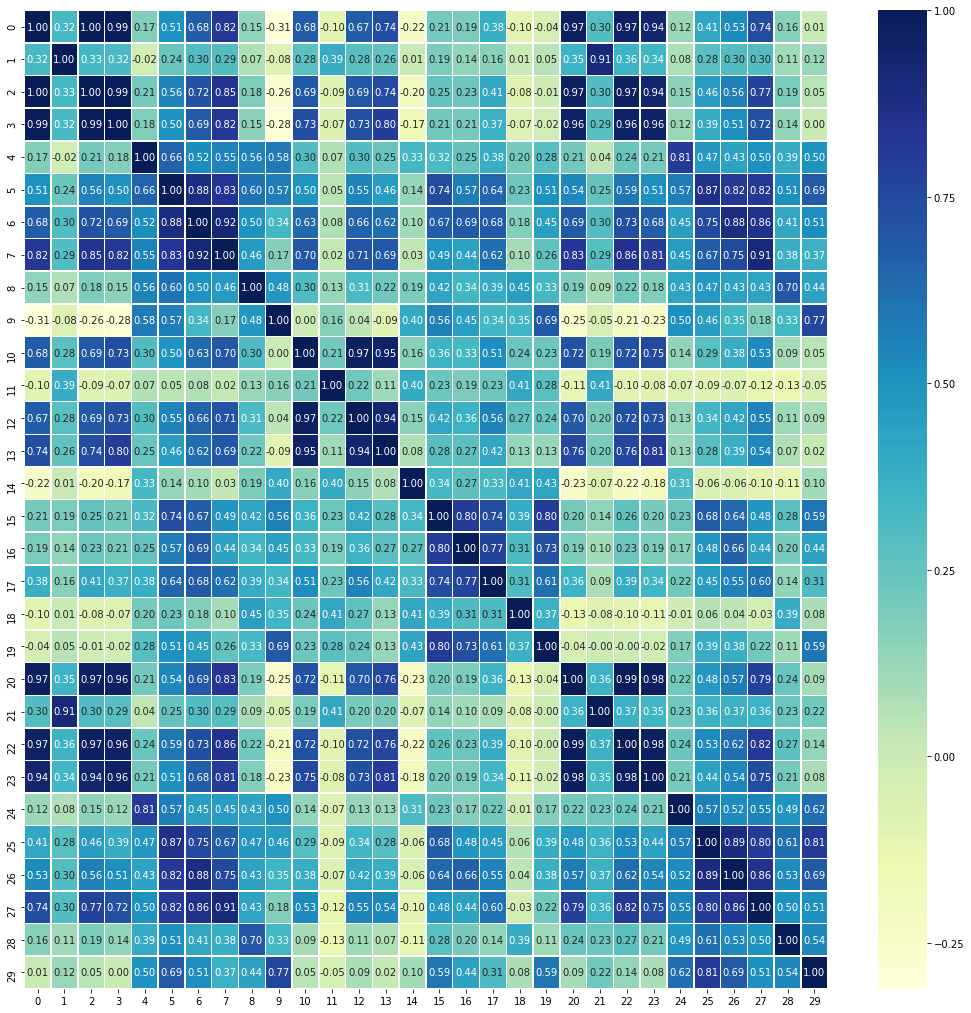

In [173]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(np.array(dp.corr())[:-1,:-1], annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="YlGnBu")
plt.show()

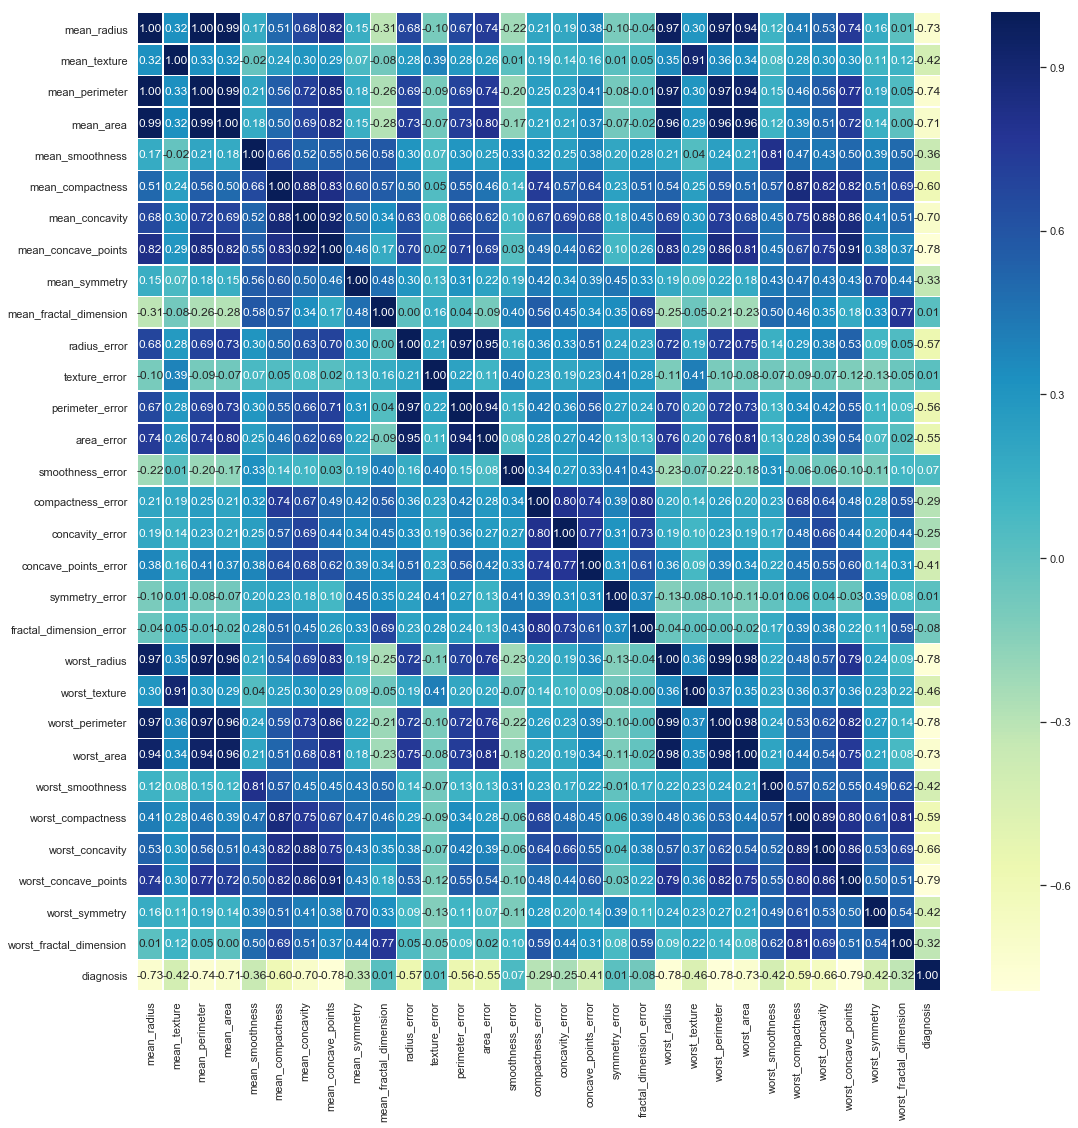

In [208]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(dp.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="YlGnBu")
plt.show()

In [129]:
dp.var().T

mean_radius                    12.418920
mean_texture                   18.498909
mean_perimeter                590.440480
mean_area                  123843.554318
mean_smoothness                 0.000198
mean_compactness                0.002789
mean_concavity                  0.006355
mean_concave_points             0.001506
mean_symmetry                   0.000752
mean_fractal_dimension          0.000050
radius_error                    0.076902
texture_error                   0.304316
perimeter_error                 4.087896
area_error                   2069.431583
smoothness_error                0.000009
compactness_error               0.000321
concavity_error                 0.000911
concave_points_error            0.000038
symmetry_error                  0.000068
fractal_dimension_error         0.000007
worst_radius                   23.360224
worst_texture                  37.776483
worst_perimeter              1129.130847
worst_area                 324167.385102
worst_smoothness

In [210]:

# Steps for Implementing VIF
# Run a multiple regression.
# Calculate the VIF factors.
# Inspect the factors for each predictor variable, if the VIF is between 5-10, 
# multicolinearity is likely present and you should consider dropping the variable.
    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

q = calculate_vif_(dp)

dropping 'mean_radius' at index: 0
dropping 'worst_radius' at index: 19
dropping 'mean_perimeter' at index: 1
dropping 'worst_perimeter' at index: 19
dropping 'mean_fractal_dimension' at index: 7
dropping 'worst_smoothness' at index: 19
dropping 'worst_texture' at index: 17
dropping 'worst_fractal_dimension' at index: 22
dropping 'worst_symmetry' at index: 21
dropping 'mean_concavity' at index: 4
dropping 'radius_error' at index: 6
dropping 'mean_smoothness' at index: 2
dropping 'worst_concave_points' at index: 17
dropping 'mean_compactness' at index: 2
dropping 'mean_area' at index: 1
dropping 'mean_symmetry' at index: 2
dropping 'worst_concavity' at index: 13
dropping 'perimeter_error' at index: 3
dropping 'mean_texture' at index: 0
dropping 'compactness_error' at index: 4
dropping 'mean_concave_points' at index: 0
dropping 'concave_points_error' at index: 4
dropping 'worst_area' at index: 6
dropping 'symmetry_error' at index: 4
dropping 'smoothness_error' at index: 2
dropping 'fract

In [236]:
for i in range(15):
    pca = PCA(n_components=i)
    pca.fit(X)
    print('{:2d} {}'.format(i, pca.explained_variance_ratio_.cumsum()))#, pca.singular_values_))  



 0 []
 1 [0.98204467]
 2 [0.98204467 0.99822116]
 3 [0.98204467 0.99822116 0.99977867]
 4 [0.98204467 0.99822116 0.99977867 0.9998996 ]
 5 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788]
 6 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453]
 7 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854]
 8 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936]
 9 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971]
10 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989]
11 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996]
12 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998]
13 [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453


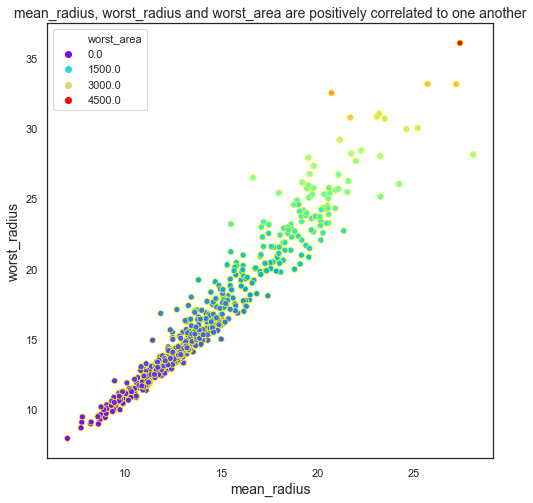

In [197]:
plt.figure(figsize=(8,8))
k=sns.scatterplot(dp["mean_radius"], dp["worst_radius"], hue=dp['worst_area'],palette="rainbow",edgecolor='yellow')
plt.xlabel("mean_radius",fontsize=14)
plt.ylabel("worst_radius",fontsize=14)
plt.title("mean_radius, worst_radius and worst_area are positively correlated to one another",fontsize=14)
plt.show()

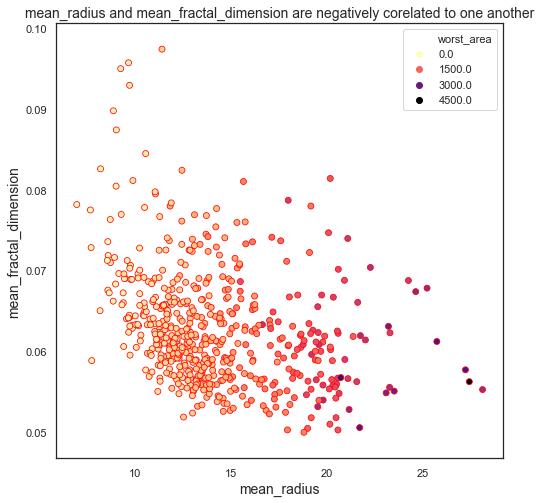

In [196]:
plt.figure(figsize=(8,8))
l=sns.scatterplot(dp["mean_radius"],dp["mean_fractal_dimension"], hue=dp["worst_area"],palette="magma_r",edgecolor='red')
plt.xlabel("mean_radius",fontsize=14)
plt.ylabel("mean_fractal_dimension",fontsize=14)
plt.title("mean_radius and mean_fractal_dimension are negatively corelated to one another",fontsize=14)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1008x720 with 0 Axes>

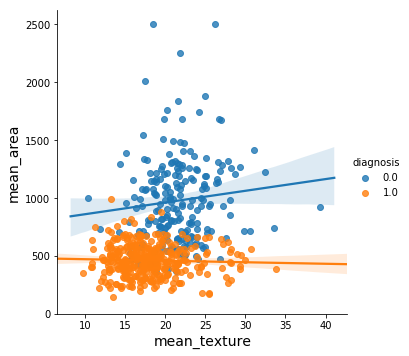

In [130]:
plt.figure(figsize=(14,10))
l2=sns.lmplot("mean_texture","mean_area", hue='diagnosis', data=dp)#palette="magma_r",edgecolor='red')
plt.xlabel("mean_texture",fontsize=14)
plt.ylabel("mean_area",fontsize=14)
#plt.title("1-Benign, 2-Malignant",fontsize=14)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


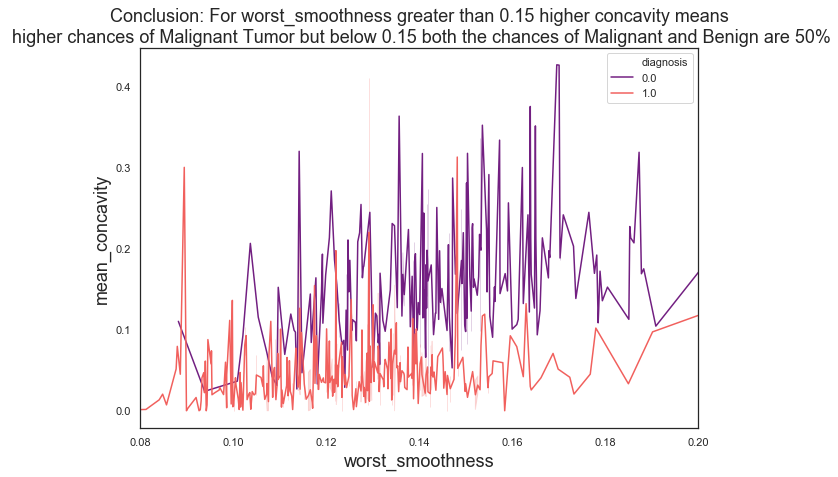

In [195]:
plt.figure(figsize=(10,7))
l=sns.lineplot(dp["worst_smoothness"],dp["mean_concavity"], hue=dp["diagnosis"],palette="magma",)#palette="magma_r",edgecolor='red')
plt.xlabel("worst_smoothness",fontsize=18)
plt.ylabel("mean_concavity",fontsize=18)
plt.xlim([0.08,0.20])
plt.title("Conclusion: For worst_smoothness greater than 0.15 higher concavity means\n higher chances of Malignant Tumor but below 0.15 both the chances of Malignant and Benign are 50%",fontsize=18)
plt.show()

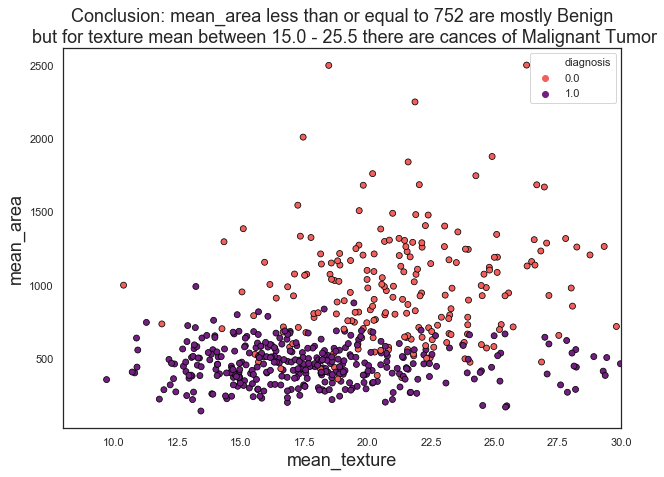

In [194]:
plt.figure(figsize=(10,7))
l=sns.scatterplot(dp["mean_texture"],dp["mean_area"], hue=dp["diagnosis"],palette="magma_r",edgecolor='black')#palette="magma_r",edgecolor='red')
plt.xlabel("mean_texture",fontsize=18)
plt.ylabel("mean_area",fontsize=18)
plt.xlim([8,30])
plt.title("Conclusion: mean_area less than or equal to 752 are mostly Benign\n but for texture mean between 15.0 - 25.5 there are cances of Malignant Tumor",fontsize=18)
plt.show()

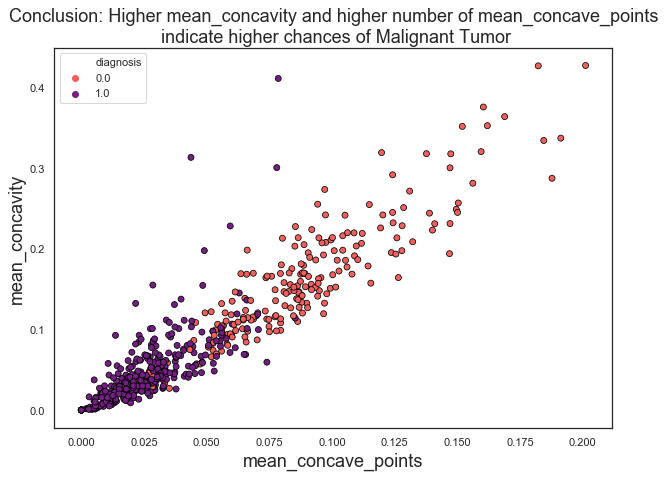

In [193]:
plt.figure(figsize=(10,7))
l=sns.scatterplot(dp["mean_concave_points"],dp["mean_concavity"], hue=dp["diagnosis"],palette="magma_r",edgecolor='black')#palette="magma_r",edgecolor='red')
plt.ylabel("mean_concavity",fontsize=18)
plt.xlabel("mean_concave_points",fontsize=18)
#plt.xlim([8,30])
plt.title("Conclusion: Higher mean_concavity and higher number of mean_concave_points\n indicate higher chances of Malignant Tumor",fontsize=18)
plt.show()

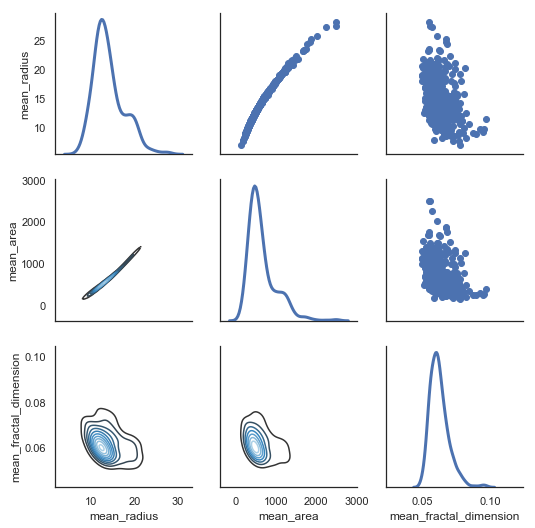

In [192]:
sns.set(style = "white")
df = dp.loc[:,["mean_radius","mean_area","mean_fractal_dimension"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


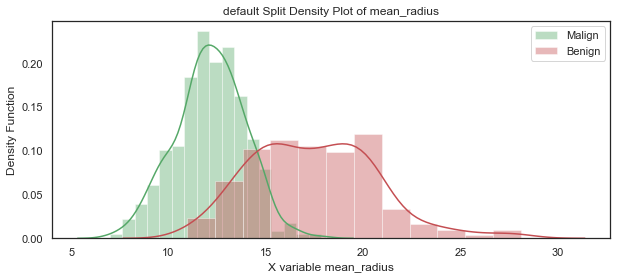

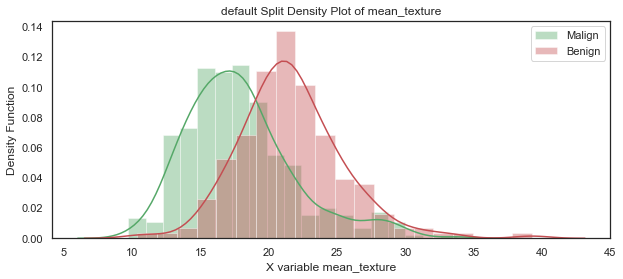

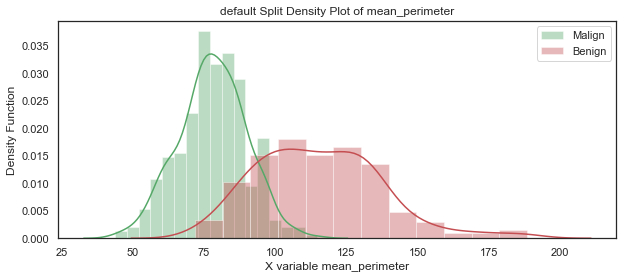

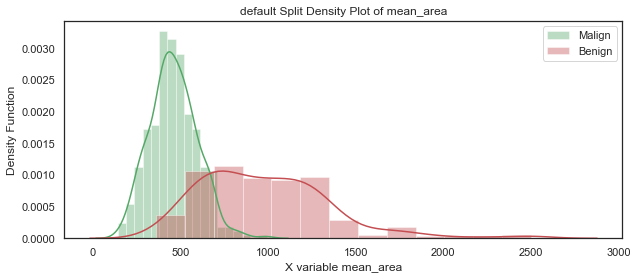

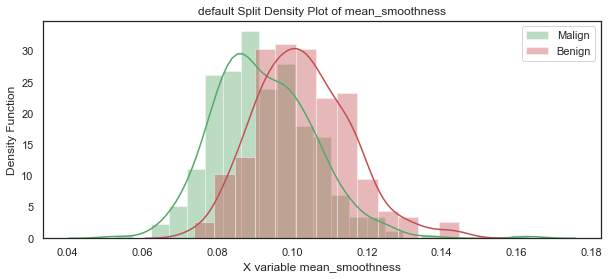

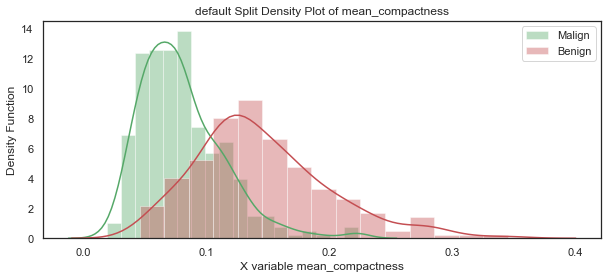

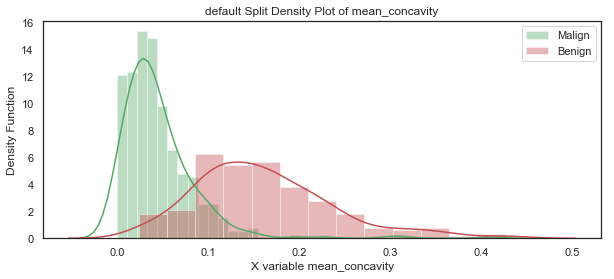

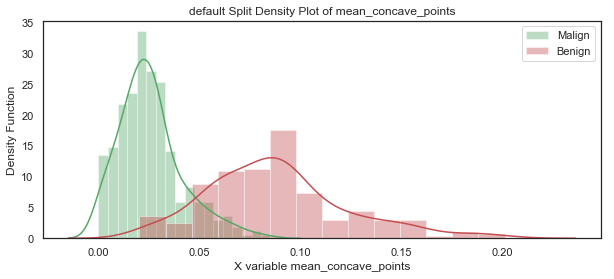

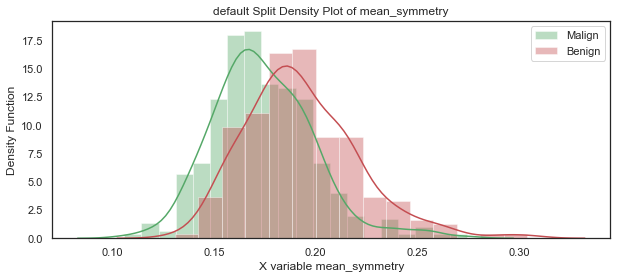

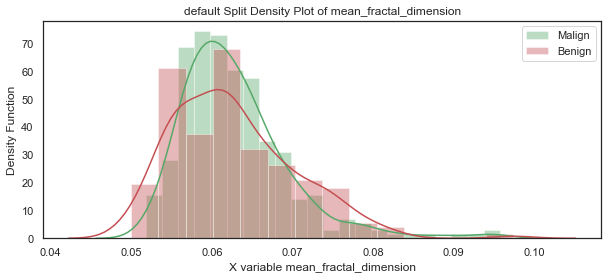

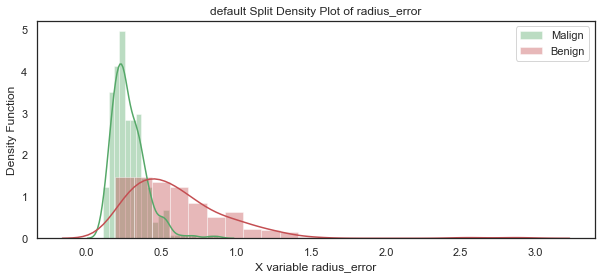

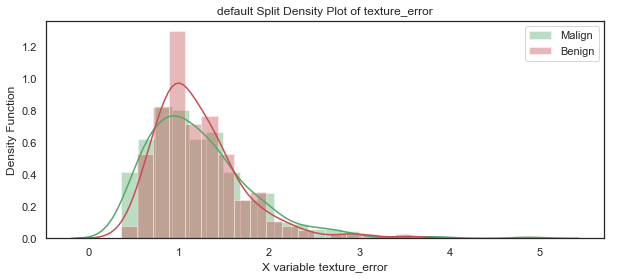

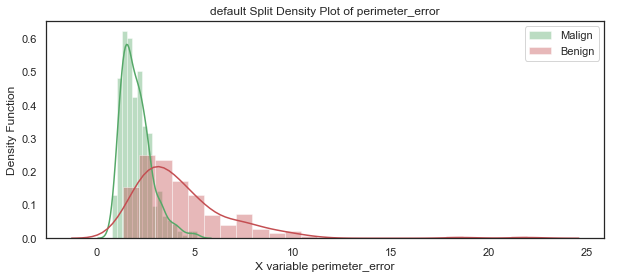

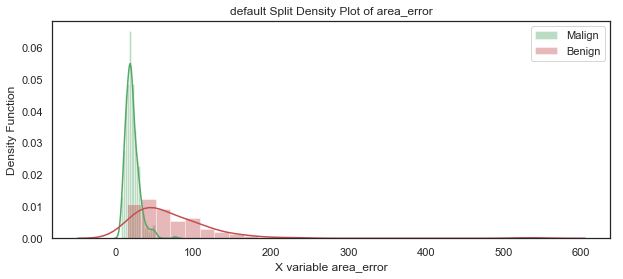

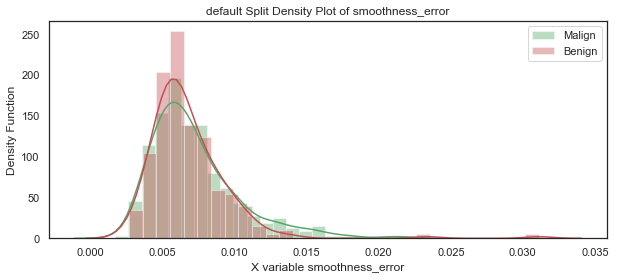

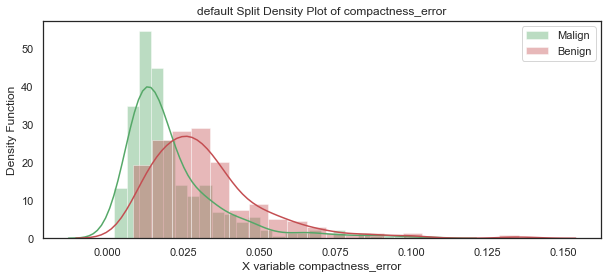

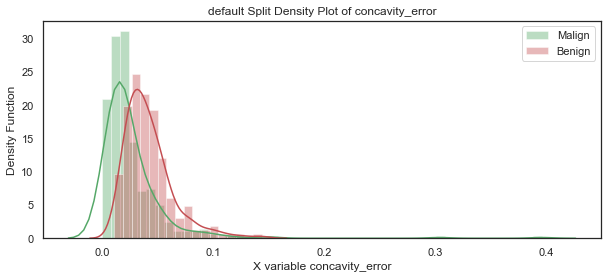

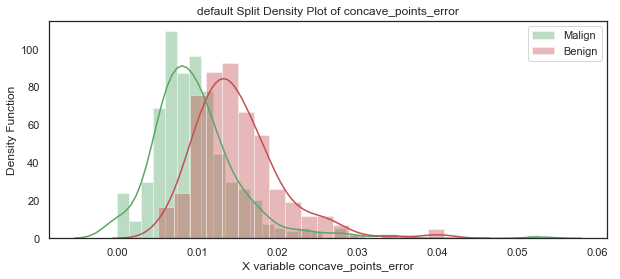

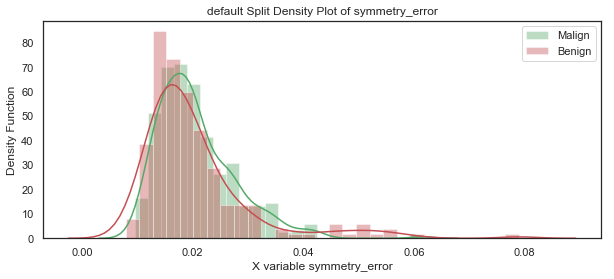

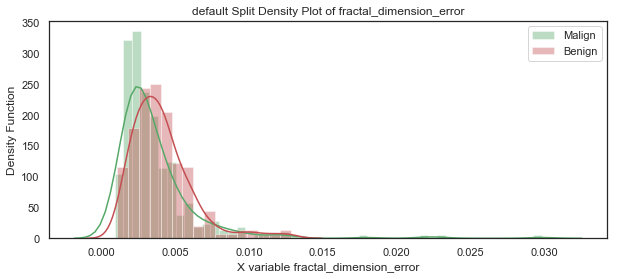

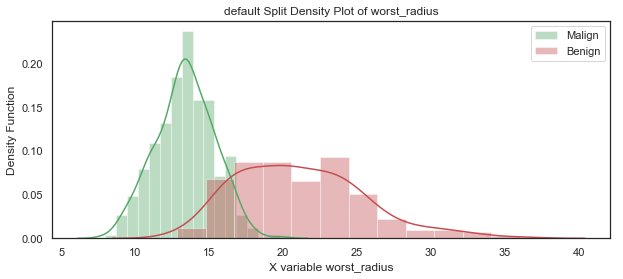

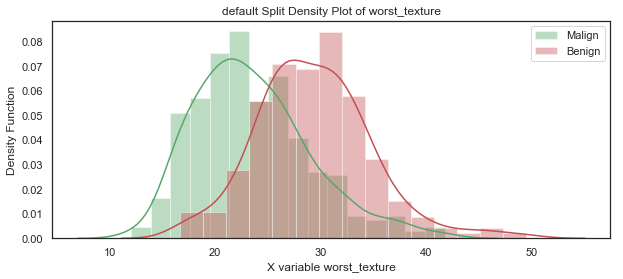

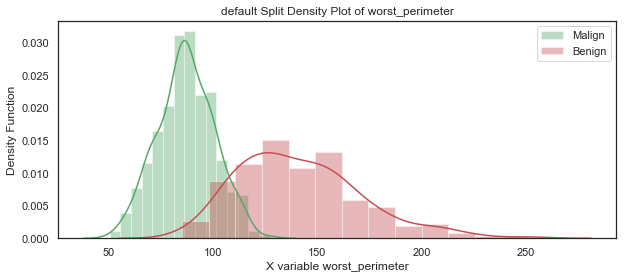

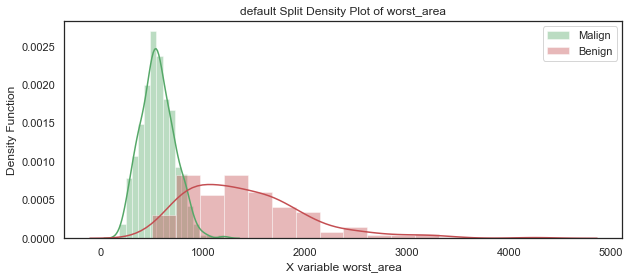

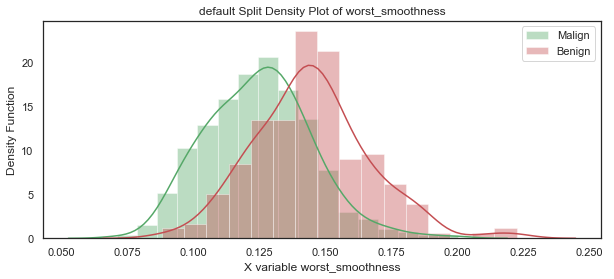

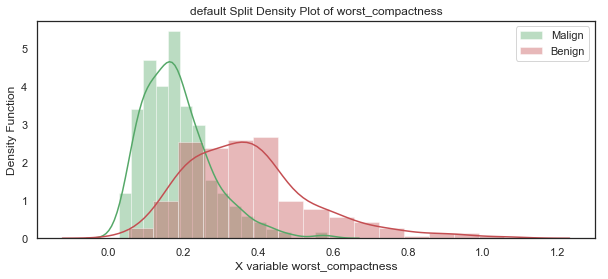

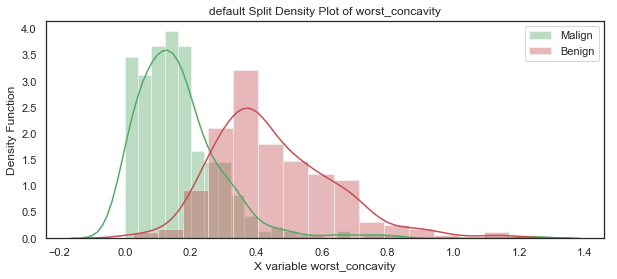

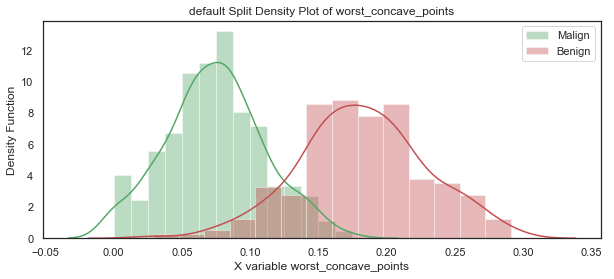

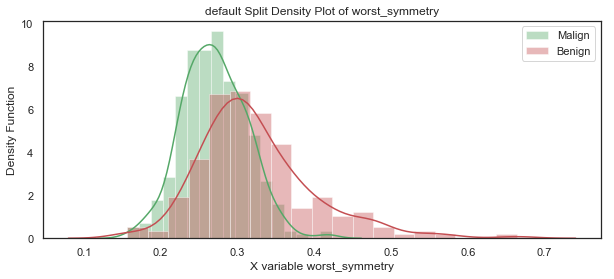

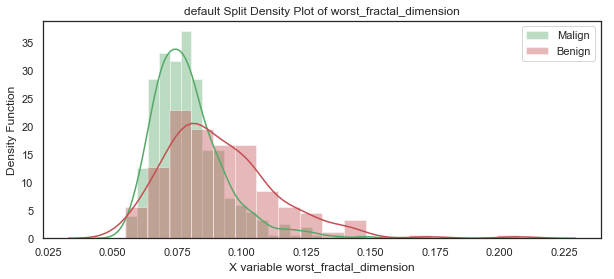

In [242]:

for feature in feature_names[:-1]:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[num_variable], kde=False, color='g', hist=True)
    sns.distplot(dp[dp['diagnosis']==1][feature], label='Malign', color='g', hist=True, norm_hist=False)
    sns.distplot(dp[dp['diagnosis']==0][feature], label='Benign', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(feature) )
    plt.ylabel('Density Function')
    plt.title(str('default Split Density Plot of ')+str(feature))
    plt.legend()
    plt.show()
    
 # variables with clear demarcation or less overlap of red and green region.


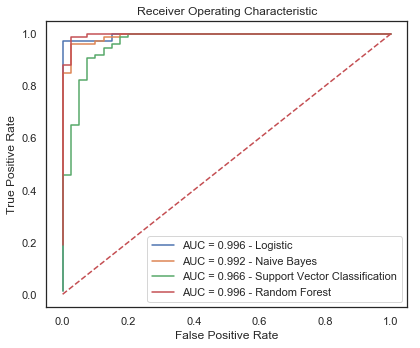

In [209]:
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=455)
gbc = GradientBoostingClassifier(verbose=1, learning_rate=0.4,warm_start=True)


plt.figure(figsize=(6, 5))
# ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
# ax2 = plt.subplot2grid((3, 1), (1, 0))
# ax3 = plt.subplot((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    fpr,tpr,_ = roc_curve(y_test, prob_pos)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'AUC = {:.3f} - {}'.format(roc_auc, name))



plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.tight_layout()
plt.show()




['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'diagnosis']